In [54]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [71]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [56]:
#Normalizing the data
x_train = x_train/255
x_test = x_test/255

In [57]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

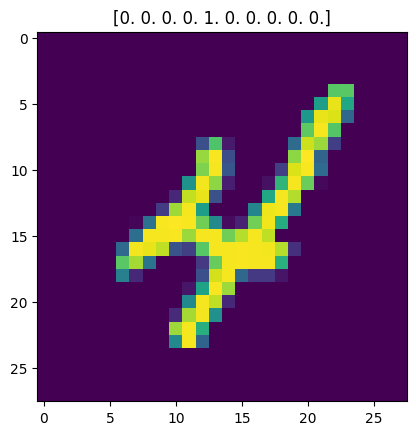

In [58]:
import matplotlib.pyplot as plt
plt.imshow(x_train[9])
plt.title(y_train[9])
plt.show()

In [59]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

In [60]:
model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(5,activation='relu'),
    Dense(10,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [61]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │         3,925 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,985 (15.57 KB)

 Trainable params: 3,985 (15.57 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
#linear(1),sigmoid(2),softmax(multi)
#dense 10 bcoz we have to predict nos. from 0 to 9
#28*28=784 | 784*5=3920 + bias of 5 hidden layers so 3925

In [63]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [68]:
model.fit(x_train,y_train,epochs=9, batch_size=32 ,verbose=2)

Epoch 1/9
1875/1875 - 3s - 2ms/step - accuracy: 0.8799 - loss: 0.4289
Epoch 2/9
1875/1875 - 6s - 3ms/step - accuracy: 0.8832 - loss: 0.4190
Epoch 3/9
1875/1875 - 5s - 2ms/step - accuracy: 0.8852 - loss: 0.4100
Epoch 4/9
1875/1875 - 5s - 3ms/step - accuracy: 0.8874 - loss: 0.4010
Epoch 5/9
1875/1875 - 4s - 2ms/step - accuracy: 0.8896 - loss: 0.3930
Epoch 6/9
1875/1875 - 3s - 2ms/step - accuracy: 0.8922 - loss: 0.3848
Epoch 7/9
1875/1875 - 5s - 3ms/step - accuracy: 0.8935 - loss: 0.3783
Epoch 8/9
1875/1875 - 4s - 2ms/step - accuracy: 0.8967 - loss: 0.3716
Epoch 9/9
1875/1875 - 4s - 2ms/step - accuracy: 0.8972 - loss: 0.3668


In [69]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8819 - loss: 0.4176


[0.3726170063018799, 0.8963000178337097]

In [70]:
model.get_weights()

[array([[ 0.01654883,  0.07511687, -0.00327291, -0.02425478,  0.06033413],
        [ 0.00511453,  0.04213278,  0.07658792, -0.06470594, -0.05482978],
        [ 0.06689966, -0.00891019,  0.05117333, -0.00450435,  0.03216834],
        ...,
        [ 0.0291511 ,  0.03200071,  0.04695782,  0.07340704, -0.02520631],
        [ 0.07603243, -0.02345709, -0.07508346,  0.03447601,  0.06362975],
        [ 0.02751821,  0.02371273, -0.03440599,  0.08306615,  0.01617927]],
       dtype=float32),
 array([0.97127223, 0.3847243 , 0.31428263, 1.2711537 , 0.2677152 ],
       dtype=float32),
 array([[ 0.54966307, -0.8224359 ,  0.45306844, -0.9998916 , -0.24498944,
         -0.58282644, -0.04718582,  0.75404364,  0.06459627,  0.19777267],
        [-1.0178804 ,  0.52298677, -0.60002464, -0.16236286,  0.50197953,
         -0.134507  , -0.80930823,  0.23661667,  0.6377278 ,  1.1113644 ],
        [ 0.32559273, -0.9924416 , -0.40342006,  0.42990458, -0.64591396,
          0.7514538 , -0.12267259, -1.4815705 ,  

In [ ]:
#model.save('mnist.h5') model can be saved and used anytime.